In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

moa = pd.read_csv("../data/processed_feature_selected/MOA/MOA_processed_feature_selected.csv.gz", compression="gzip")
moa

,Standardized_SMILES,dopamine_receptor_agonist,phosphodiesterase_inhibitor,benzodiazepine_receptor_agonist,tachykinin_antagonist,glutamate_receptor_antagonist,acetylcholine_receptor_agonist,glycogen_synthase_kinase_inhibitor,potassium_channel_activator,SRC_inhibitor,...,gastroenterology,hematology,allergy,orthopedics,urology,dental,critical_care,metabolism,otolaryngology,radiology
0,BrC1C(Br)C(Br)C(Br)C(Br)C1Br,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Brc1c(Br)c(Br)c2[n-]nnc2c1Br,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Brc1c(NC2=[NH+]CCN2)ccc2nccnc12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brc1cc2c(cc1C1[NH2+]c3ccccc3C3C=CCC31)OCO2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brc1ccc([NH2+]C2C3CC4CC(C3)CC2C4)cc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,c1cncc(C[NH+]2CCC(n3ncc4c(N5CCOCC5)nc(-c5ccc6[...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6609,c1coc(-c2nnc3sc(C4CCCCC4)nn23)c1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6610,c1coc(CN=c2[n-]cnc3[n-]cnc23)c1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6611,c1nc(CC2CC[NH2+]CC2)c[n-]1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
moa.Standardized_SMILES.nunique()

6613

In [19]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [20]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(moa, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,dopamine_receptor_agonist,phosphodiesterase_inhibitor,benzodiazepine_receptor_agonist,...,gastroenterology,hematology,allergy,orthopedics,urology,dental,critical_care,metabolism,otolaryngology,radiology
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
849,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
from sklearn.feature_selection import VarianceThreshold

# Specify a variance threshold. Features with a variance below this threshold will be removed.
# As an example, we'll use a threshold of 0.2 (you can adjust this value based on your needs).
selector = VarianceThreshold(threshold=0.001)

# Considering only the subset of columns specified
subset = merged_df[merged_df.columns[7:]]

# Fit the variance threshold to the data
selector.fit(subset)

# Transform the data
subset_transformed = selector.transform(subset)

# Convert the transformed data back to a dataframe
df_transformed = pd.DataFrame(subset_transformed, columns=subset.columns[selector.get_support()])
df_transformed

# If you want to keep the original first two and last two columns and just replace the columns between them with the transformed data
merged_df = pd.concat([merged_df[merged_df.columns[:7]], df_transformed], axis=1)
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,dopamine_receptor_agonist,phosphodiesterase_inhibitor,benzodiazepine_receptor_agonist,...,gastroenterology,hematology,allergy,orthopedics,urology,dental,critical_care,metabolism,otolaryngology,radiology
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
849,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


df = merged_df
results = []

for label in merged_df.columns[7:].to_list():
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2. Chi-squared Test

    # Create a contingency table
    contingency_table = pd.crosstab(df["DICT _ Concern"], df[label])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #Store results
    label_proportions = df[label].mean()
    results.append({
        'Label': label,
        'Proportion': label_proportions,
        'Chi2 value': chi2,
        'P value': p
    })
    
    print(f'Proportion of {label}, chi2 {chi2}, p {p}')

results_df = pd.DataFrame(results)
results_df


Proportion of dopamine_receptor_agonist, chi2 7.944278644482104, p 0.018833099938115928
Proportion of phosphodiesterase_inhibitor, chi2 2.9391089163618576, p 0.2300279494300024
Proportion of benzodiazepine_receptor_agonist, chi2 1.735359955770657, p 0.419924654483224
Proportion of tachykinin_antagonist, chi2 1.09515935013574, p 0.5783479076334563
Proportion of glutamate_receptor_antagonist, chi2 5.150213179460071, p 0.07614570601578759
Proportion of acetylcholine_receptor_agonist, chi2 5.150213179460071, p 0.07614570601578759
Proportion of potassium_channel_activator, chi2 1.2830089891184355, p 0.526499711925019
Proportion of SRC_inhibitor, chi2 4.556863278064692, p 0.10244475113585044
Proportion of serotonin_receptor_agonist, chi2 5.404490996160445, p 0.06705477219705136
Proportion of JAK_inhibitor, chi2 11.432555919258046, p 0.003291940864815191
Proportion of adenosine_receptor_antagonist, chi2 0.8232392038619638, p 0.6625762708539256
Proportion of topoisomerase_inhibitor, chi2 4.055

Proportion of tumor_necrosis_factor_production_inhibitor, chi2 4.556863278064692, p 0.10244475113585044
Proportion of antihistamine, chi2 2.27575113122172, p 0.32049917856293453
Proportion of mineralocorticoid_receptor_antagonist, chi2 1.09515935013574, p 0.5783479076334563
Proportion of RET_tyrosine_kinase_inhibitor, chi2 5.965194568644457, p 0.0506610816069221
Proportion of KIT_inhibitor, chi2 10.243152040645782, p 0.005966611979318477
Proportion of RNA_synthesis_inhibitor, chi2 1.2984173097427385, p 0.5224590586461142
Proportion of coagulation_factor_inhibitor, chi2 3.1560644265502313, p 0.20638081231729336
Proportion of voltage-gated_sodium_channel_blocker, chi2 0.7791202015837055, p 0.6773547767998164
Proportion of antimalarial_agent, chi2 0.8232392038619638, p 0.6625762708539256
Proportion of MEK_inhibitor, chi2 9.135246571610208, p 0.010382606905563252
Proportion of farnesyltransferase_inhibitor, chi2 1.2830089891184355, p 0.526499711925019
Proportion of rho_associated_kinase_in

Proportion of psoriasis, chi2 2.705525442826428, p 0.2585250404586186
Proportion of acute_myeloid_leukemia_(AML), chi2 11.703738658144117, p 0.0028745207074806745
Proportion of bronchitis, chi2 0.8365464598587266, p 0.6581823687323036
Proportion of fungal_infection, chi2 3.8581048611462396, p 0.14528580166286034
Proportion of hepatitis_B, chi2 14.604154466783784, p 0.0006741369799245154
Proportion of dermatitis, chi2 0.5452553579371893, p 0.7613762112396308
Proportion of depression, chi2 12.46871619688795, p 0.001960887507174972
Proportion of spasms, chi2 2.1192567008665435, p 0.346584594411649
Proportion of hemorrhage, chi2 2.56904037868238, p 0.27678335538086896
Proportion of non-small_cell_lung_cancer_(NSCLC), chi2 0.2547242709140932, p 0.880414785449751
Proportion of anxiety, chi2 1.0554843109517982, p 0.5899354496292208
Proportion of corticosteroid-responsive_dermatoses, chi2 1.2830089891184355, p 0.526499711925019
Proportion of osteoporosis, chi2 0.5452553579371893, p 0.761376211

Proportion of joint_pain, chi2 1.592115074981318, p 0.45110392326855275
Proportion of urticaria, chi2 1.5048074174710087, p 0.471232484662541
Proportion of tapeworm, chi2 0.7791202015837055, p 0.6773547767998164
Proportion of colitis, chi2 8.976003785562915, p 0.011243086272738867
Proportion of cholera, chi2 2.27575113122172, p 0.32049917856293453
Proportion of myeloma, chi2 10.039813885846058, p 0.006605141335862382
Proportion of endocarditis, chi2 2.242815723374775, p 0.32582076100456325
Proportion of ankylosing_spondylitis, chi2 9.135246571610208, p 0.010382606905563252
Proportion of emphysema, chi2 1.5619198374133787, p 0.4579661899298685
Proportion of psoriatic_arthritis, chi2 0.07604544283381316, p 0.9626910669376127
Proportion of tonsillitis, chi2 4.536682584163355, p 0.10348368701489369
Proportion of pulmonary_embolism_(PE), chi2 3.1560644265502313, p 0.20638081231729336
Proportion of nephrotic_syndrome, chi2 7.743604549708903, p 0.020820810766174657
Proportion of gynecologic_i

Proportion of F2, chi2 0.5742601521526154, p 0.7504141115651315
Proportion of ERBB2, chi2 4.67252015796033, p 0.09668857049789228
Proportion of CYP2B6, chi2 3.7857585722181204, p 0.15063745548957275
Proportion of BRD4, chi2 2.27575113122172, p 0.32049917856293453
Proportion of PIK3CG, chi2 2.9758841917727734, p 0.2258369284050408
Proportion of MAP2K1, chi2 11.432555919258046, p 0.003291940864815191
Proportion of FKBP1A, chi2 0.7791202015837055, p 0.6773547767998164
Proportion of PYGM, chi2 2.907085806799784, p 0.23374069866795694
Proportion of OPRK1, chi2 1.3468703138123612, p 0.5099537942356049
Proportion of PTGER2, chi2 2.56904037868238, p 0.27678335538086896
Proportion of AHR, chi2 1.09515935013574, p 0.5783479076334563
Proportion of AVPR1A, chi2 5.150213179460071, p 0.07614570601578759
Proportion of IKBKB, chi2 2.9758841917727734, p 0.2258369284050408
Proportion of PSEN1, chi2 2.27575113122172, p 0.32049917856293453
Proportion of PDE5A, chi2 3.932657854605029, p 0.13996975333767445

Proportion of PLA2G1B, chi2 1.09515935013574, p 0.5783479076334563
Proportion of TH, chi2 0.5452553579371893, p 0.7613762112396308
Proportion of SLC12A3, chi2 6.445376127368028, p 0.03984780074165571
Proportion of CYP2C9, chi2 2.8371276380307977, p 0.24206141137277384
Proportion of HCRTR2, chi2 2.907085806799784, p 0.23374069866795694
Proportion of ADORA2B, chi2 1.0889052569287279, p 0.5801592591078917
Proportion of SCN9A, chi2 2.2246583859749807, p 0.32879224791217665
Proportion of PRKDC, chi2 2.27575113122172, p 0.32049917856293453
Proportion of PDE10A, chi2 2.1321192951668695, p 0.3443627581999835
Proportion of CHRM4, chi2 12.106195632778999, p 0.0023505690848206764
Proportion of CACNA1I, chi2 0.03464190183296281, p 0.9828281943994415
Proportion of P2RY1, chi2 0.5452553579371893, p 0.7613762112396308
Proportion of TAT, chi2 1.137035780086927, p 0.5663642310205893
Proportion of RET, chi2 10.243152040645782, p 0.005966611979318477
Proportion of HDAC3, chi2 1.960863998906285, p 0.37514

,Label,Proportion,Chi2 value,P value
0,dopamine_receptor_agonist,0.009401,7.944279,0.018833
1,phosphodiesterase_inhibitor,0.014101,2.939109,0.230028
2,benzodiazepine_receptor_agonist,0.005875,1.735360,0.419925
3,tachykinin_antagonist,0.002350,1.095159,0.578348
4,glutamate_receptor_antagonist,0.004700,5.150213,0.076146
...,...,...,...,...
709,dental,0.005875,1.204776,0.547503
710,critical_care,0.005875,2.972887,0.226176
711,metabolism,0.011751,16.085101,0.000321
712,otolaryngology,0.021152,2.392160,0.302377


In [23]:
results_df["Chi2 value" ] = results_df["Chi2 value"].astype(float)
results_df = results_df.sort_values("P value", ascending=True)
results_df

,Label,Proportion,Chi2 value,P value
388,PTGS2,0.028202,27.697309,9.673995e-07
389,PTGS1,0.028202,27.697309,9.673995e-07
59,cyclooxygenase_inhibitor,0.029377,25.448484,2.978049e-06
708,urology,0.232667,24.911806,3.894665e-06
189,hypertension,0.074031,24.386549,5.064402e-06
...,...,...,...,...
180,phosphatase_inhibitor,0.004700,0.076045,9.626911e-01
217,nausea,0.015276,0.049706,9.754533e-01
305,vomiting,0.015276,0.049706,9.754533e-01
603,CACNA1I,0.008226,0.034642,9.828282e-01


In [24]:
results_df.Label.to_list()

['PTGS2',
 'PTGS1',
 'cyclooxygenase_inhibitor',
 'urology',
 'hypertension',
 'tyrosine_kinase_receptor_inhibitor',
 'HTR1D',
 'osteoarthritis',
 'HTR1B',
 'rheumatoid_arthritis',
 'HTR1A',
 'PDGFR_tyrosine_kinase_receptor_inhibitor',
 'acetylcholine_receptor_antagonist',
 'FLT4',
 'infectious_disease',
 'HTR2A',
 'CHRM1',
 'congestive_heart_failure',
 'metabolism',
 'bacterial_DNA_gyrase_inhibitor',
 'PDGFRB',
 'FLT1',
 'bacterial_cell_wall_synthesis_inhibitor',
 'nucleoside_reverse_transcriptase_inhibitor',
 'SLC6A2',
 'CHRM2',
 'CHRM3',
 'neurology/psychiatry',
 'VEGFR_inhibitor',
 'KIT',
 'hepatitis_B',
 'ADRB2',
 'DRD2',
 'migraine_headache',
 'ADRA1A',
 'ventricular_tachycardia_(VT)',
 'Abl_kinase_inhibitor',
 'Bcr-Abl_kinase_inhibitor',
 'PDGFRA',
 'ABL1',
 'KCNH2',
 'TOP2A',
 'kinase_inhibitor',
 'bacterial_30S_ribosomal_subunit_inhibitor',
 'cardiology',
 'depression',
 'ADRA2A',
 'CHRM4',
 'ventricular_arrhythmias',
 'oncology',
 'adrenergic_receptor_antagonist',
 'headache'

<Figure size 2400x1800 with 0 Axes>

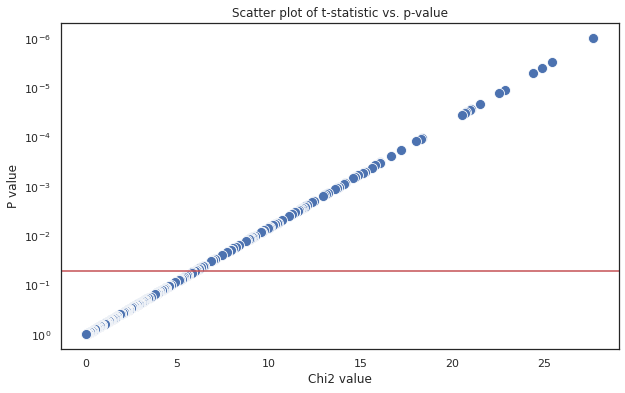

In [25]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Chi2 value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.savefig(f'SIDER_fractions_chisquare_comparison.png', bbox_inches='tight')
plt.show()
           

In [26]:
metrics_df = pd.DataFrame(columns=['MOA', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_list = []  

for effect in merged_df.columns[7:].to_list():    

    # Assuming merged_df is the dataframe from previous example

    y_true = merged_df['DICTrank']
    y_pred = merged_df[effect]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    

      # Append metrics for the current effect to the results list
    results_list.append({
        'MOA': effect,
        'Accuracy': accuracy * 100,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the results list to a DataFrame and concatenate to the metrics dataframe
metrics_df = pd.concat([metrics_df, pd.DataFrame(results_list)], ignore_index=True)

# Display the metrics dataframe
metrics_df

,MOA,Accuracy,Precision,Recall,F1-Score
0,dopamine_receptor_agonist,26.556992,1.0,0.012638,0.024961
1,phosphodiesterase_inhibitor,26.792009,0.916667,0.017378,0.034109
2,benzodiazepine_receptor_agonist,26.204465,1.0,0.007899,0.015674
3,tachykinin_antagonist,25.616921,0.5,0.00158,0.00315
4,glutamate_receptor_antagonist,26.086957,1.0,0.006319,0.012559
...,...,...,...,...,...
709,dental,25.73443,0.6,0.004739,0.009404
710,critical_care,26.204465,1.0,0.007899,0.015674
711,metabolism,24.911868,0.2,0.00316,0.006221
712,otolaryngology,26.086957,0.611111,0.017378,0.033794


In [27]:
convert_cols = ['Accuracy','Precision', 'Recall', 'F1-Score']  # Add other columns that you want to convert
for col in convert_cols:
    metrics_df[col] = metrics_df[col].astype(float)
metrics_df    

,MOA,Accuracy,Precision,Recall,F1-Score
0,dopamine_receptor_agonist,26.556992,1.000000,0.012638,0.024961
1,phosphodiesterase_inhibitor,26.792009,0.916667,0.017378,0.034109
2,benzodiazepine_receptor_agonist,26.204465,1.000000,0.007899,0.015674
3,tachykinin_antagonist,25.616921,0.500000,0.001580,0.003150
4,glutamate_receptor_antagonist,26.086957,1.000000,0.006319,0.012559
...,...,...,...,...,...
709,dental,25.734430,0.600000,0.004739,0.009404
710,critical_care,26.204465,1.000000,0.007899,0.015674
711,metabolism,24.911868,0.200000,0.003160,0.006221
712,otolaryngology,26.086957,0.611111,0.017378,0.033794


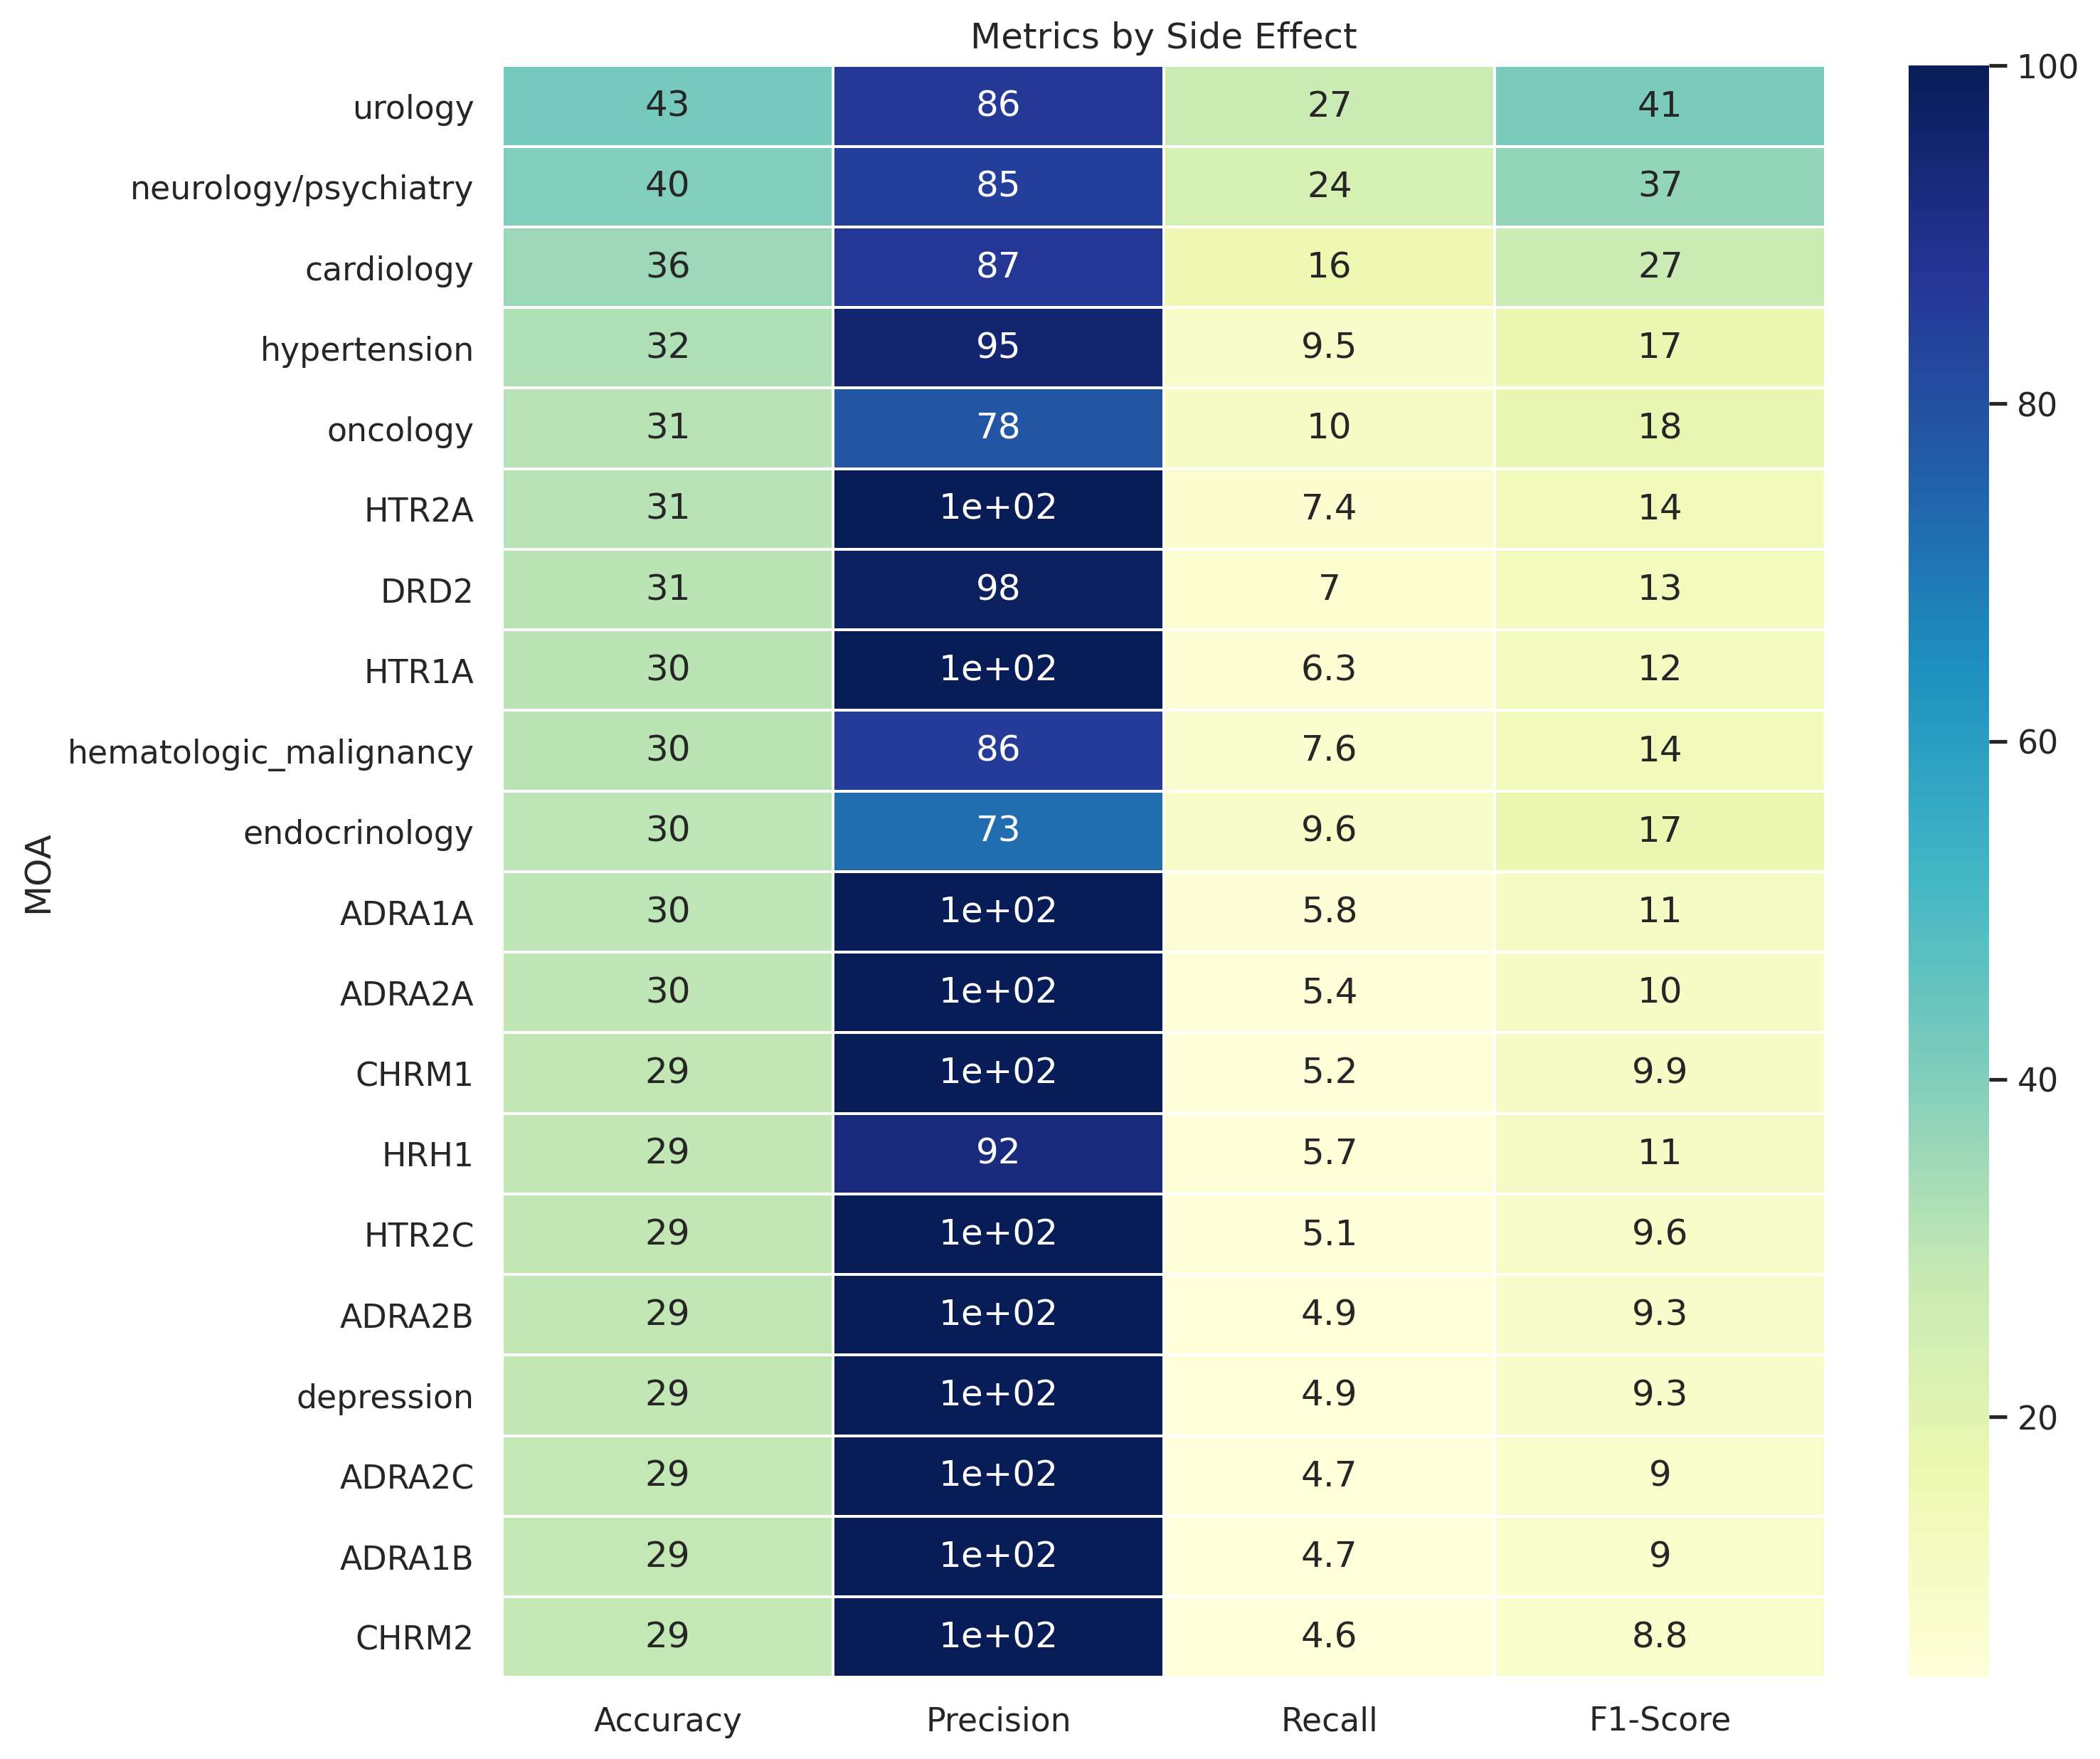

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = metrics_df.sort_values("Accuracy", ascending=False)[:20]

# Convert columns to float type (or you can also use pd.to_numeric())
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    df[col] = df[col].astype(float)

# Handle NaN values (if any). Here, I'm filling NaNs with 0.
df.fillna(0, inplace=True)

# Normalize the metrics to make them comparable
df['Precision'] = df['Precision'] * 100
df['Recall'] = df['Recall'] * 100
df['F1-Score'] = df['F1-Score'] * 100

# Set the Side_Effect column as the index for the heatmap
df.set_index('MOA', inplace=True)

# Plotting heatmap
plt.figure(figsize=(10,10), dpi=300)
sns.heatmap(df, cmap="YlGnBu", annot=True, linewidths=.5)
plt.title('Metrics by Side Effect')
plt.show()


In [34]:
k = metrics_df[metrics_df["Precision"]==1]
k.MOA.to_list()

['dopamine_receptor_agonist',
 'benzodiazepine_receptor_agonist',
 'glutamate_receptor_antagonist',
 'acetylcholine_receptor_agonist',
 'potassium_channel_activator',
 'SRC_inhibitor',
 'JAK_inhibitor',
 'prostanoid_receptor_agonist',
 'glucocorticoid_receptor_agonist',
 'adenosine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'androgen_receptor_antagonist',
 'adrenergic_receptor_antagonist',
 'dopamine_reuptake_inhibitor',
 'GABA_receptor_modulator',
 'serotonin_receptor_antagonist',
 'cholinergic_receptor_antagonist',
 'nicotinic_receptor_agonist',
 'HDAC_inhibitor',
 'thymidylate_synthase_inhibitor',
 'acetylcholine_receptor_antagonist',
 'antiviral',
 'retinoid_receptor_agonist',
 'PDGFR_tyrosine_kinase_receptor_inhibitor',
 "Bruton's_tyrosine_kinase_(BTK)_inhibitor",
 'prostanoid_receptor_antagonist',
 'anticancer_agent',
 'endothelin_receptor_antagonist',
 'CC_chemokine_receptor_antagonist',
 'tyrosine_kinase_inhibitor',
 'isocitrate_dehydrogenase_inhibitor',
 'angiotensin

In [35]:
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,dopamine_receptor_agonist,phosphodiesterase_inhibitor,benzodiazepine_receptor_agonist,...,gastroenterology,hematology,allergy,orthopedics,urology,dental,critical_care,metabolism,otolaryngology,radiology
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
849,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
moa.columns[1:]

Index(['dopamine_receptor_agonist', 'phosphodiesterase_inhibitor',
       'benzodiazepine_receptor_agonist', 'tachykinin_antagonist',
       'glutamate_receptor_antagonist', 'acetylcholine_receptor_agonist',
       'glycogen_synthase_kinase_inhibitor', 'potassium_channel_activator',
       'SRC_inhibitor', 'serotonin_receptor_agonist',
       ...
       'gastroenterology', 'hematology', 'allergy', 'orthopedics', 'urology',
       'dental', 'critical_care', 'metabolism', 'otolaryngology', 'radiology'],
      dtype='object', length=887)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in merged_df.columns[7:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2.Tests

    # Create a contingency table
    contingency_table = pd.crosstab(merged_df["DICTrank"], merged_df[label])
        
    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results.append({
            'Label': label,
            'Proportion': merged_df[label].mean(),
            'Test': 'Chi2',
            'Statistic value': chi2,
            'P value': p
    })

    

results_df = pd.DataFrame(results)
results_df

Proportion of dopamine_receptor_agonist
Proportion of phosphodiesterase_inhibitor
Proportion of benzodiazepine_receptor_agonist
Proportion of tachykinin_antagonist
Proportion of glutamate_receptor_antagonist
Proportion of acetylcholine_receptor_agonist
Proportion of potassium_channel_activator
Proportion of SRC_inhibitor
Proportion of serotonin_receptor_agonist
Proportion of JAK_inhibitor
Proportion of adenosine_receptor_antagonist
Proportion of topoisomerase_inhibitor
Proportion of prostanoid_receptor_agonist
Proportion of progesterone_receptor_agonist
Proportion of glucocorticoid_receptor_agonist
Proportion of adrenergic_receptor_agonist
Proportion of carbonic_anhydrase_inhibitor
Proportion of adenosine_receptor_agonist
Proportion of dopamine_receptor_antagonist
Proportion of androgen_receptor_antagonist
Proportion of GABA_receptor_antagonist
Proportion of melatonin_receptor_agonist
Proportion of cholesterol_inhibitor
Proportion of adrenergic_receptor_antagonist
Proportion of lipoxyg

Proportion of myocardial_infarction
Proportion of seizures
Proportion of amebiasis
Proportion of common_cold
Proportion of ear_infections
Proportion of pharyngitis
Proportion of gonorrhea
Proportion of meningitis
Proportion of anesthetic
Proportion of urinary_incontinence
Proportion of menopause
Proportion of claudication
Proportion of otitis
Proportion of testicular_carcinoma
Proportion of hypertriglyceridemia
Proportion of eczema
Proportion of endometriosis
Proportion of gastrointestinal_roundworms
Proportion of anemia
Proportion of Hodgkin's_lymphoma
Proportion of fever
Proportion of hypercalcemia
Proportion of gastroesophageal_reflux_disease_(GERD)
Proportion of thrombosis
Proportion of senile_dementia
Proportion of coronary_artery_disease_(CAD)
Proportion of ventricular_tachycardia_(VT)
Proportion of Alzheimer's_disease
Proportion of atrial_fibrillation_(AF)
Proportion of itching
Proportion of bronchospasm
Proportion of sinusitis
Proportion of hypercholesterolemia
Proportion of se

Proportion of GABRQ
Proportion of SRR
Proportion of neurology/psychiatry
Proportion of dermatology
Proportion of obstetrics/gynecology
Proportion of oncology
Proportion of nephrology
Proportion of infectious_disease
Proportion of hematologic_malignancy
Proportion of endocrinology
Proportion of cardiology
Proportion of ophthalmology
Proportion of rheumatology
Proportion of pulmonary
Proportion of gastroenterology
Proportion of hematology
Proportion of allergy
Proportion of orthopedics
Proportion of urology
Proportion of dental
Proportion of critical_care
Proportion of metabolism
Proportion of otolaryngology
Proportion of radiology


,Label,Proportion,Test,Statistic value,P value
0,dopamine_receptor_agonist,0.009401,Chi2,1.589689,0.207371
1,phosphodiesterase_inhibitor,0.014101,Chi2,1.099035,0.294478
2,benzodiazepine_receptor_agonist,0.005875,Chi2,0.643753,0.422355
3,tachykinin_antagonist,0.002350,Chi2,0.000000,1.000000
4,glutamate_receptor_antagonist,0.004700,Chi2,0.362885,0.546908
...,...,...,...,...,...
709,dental,0.005875,Chi2,0.050709,0.821834
710,critical_care,0.005875,Chi2,0.643753,0.422355
711,metabolism,0.011751,Chi2,12.950568,0.000320
712,otolaryngology,0.021152,Chi2,1.062806,0.302576


In [38]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df = results_df.sort_values("Statistic value", ascending=False)
results_df

,Label,Proportion,Test,Statistic value,P value
708,urology,0.232667,Chi2,18.626480,0.000016
697,infectious_disease,0.158637,Chi2,16.534588,0.000048
346,HTR2A,0.055229,Chi2,15.739200,0.000073
189,hypertension,0.074031,Chi2,14.370233,0.000150
356,HTR1A,0.047004,Chi2,13.078831,0.000299
...,...,...,...,...,...
372,MMP9,0.001175,Chi2,0.000000,1.000000
366,P2RX7,0.001175,Chi2,0.000000,1.000000
362,ACHE,0.010576,Chi2,0.000000,1.000000
360,TRPV1,0.001175,Chi2,0.000000,1.000000


In [41]:
results_df.Label.to_list()

['urology',
 'infectious_disease',
 'HTR2A',
 'hypertension',
 'HTR1A',
 'nucleoside_reverse_transcriptase_inhibitor',
 'metabolism',
 'DRD2',
 'ADRA1A',
 'neurology/psychiatry',
 'hepatitis_B',
 'cardiology',
 'ADRA2A',
 'CHRM1',
 'bacterial_30S_ribosomal_subunit_inhibitor',
 'HTR2C',
 'ADRA2B',
 'depression',
 'ADRA2C',
 'ADRA1B',
 'CHRM2',
 'CHRM3',
 'urinary_tract_infections',
 'SLC6A4',
 'DRD1',
 'SLC5A2',
 'sodium/glucose_cotransporter_inhibitor',
 'HTR1B',
 'dopamine_receptor_antagonist',
 'DRD3',
 'ADRA1D',
 'ADRB1',
 'DRD4',
 'bone_and_joint_infections',
 'bacterial_cell_wall_synthesis_inhibitor',
 'respiratory_tract_infections',
 'intra-abdominal_infections',
 'skin_infections',
 'SLC6A2',
 'HTR1D',
 'serotonin_receptor_antagonist',
 'schizophrenia',
 'HTR7',
 'ADRB2',
 'adrenergic_receptor_antagonist',
 'HTR6',
 'bacterial_septicemia',
 'diarrhea',
 'HRH1',
 'DRD5',
 'CHRM4',
 'HTR2B',
 'acetylcholine_receptor_antagonist',
 'gram-negative_bacterial_infections',
 'HIV_integra

<Figure size 2400x1800 with 0 Axes>

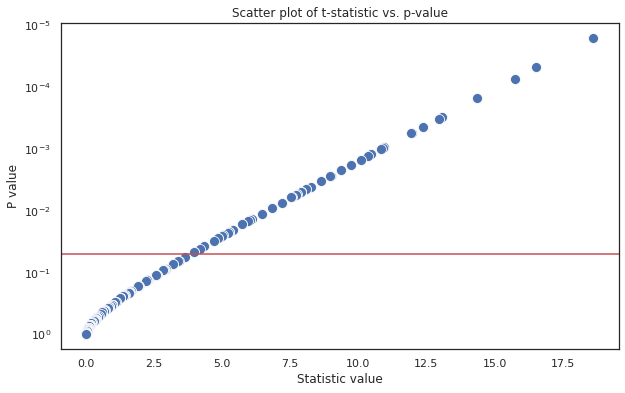

In [39]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           